# <center> Profil Dicoding </center>

Nama  : Sarah Salsabila

Email : m314v4331@dicoding.org

Alamat: Karawang , Jawa barat .

## <center> System Recommendation </center>

## proyek Overview
Pada proyek kali ini, saya akan mencoba membuat sebuah sistem rekomendasi mengenai film .menurut wikipedia film merupakan serangkaian gambar diam, yang ketika ditampilkan pada layar akan menciptakan ilusi gambar bergerak karena efek fenomena phi. Ilusi optik ini memaksa penonton untuk melihat gerakan berkelanjutan antar objek yang berbeda secara cepat dan berturut-turut.

Menonton film pada masa pandemi menjadi salah satu hiburan masyarakat untuk menemani keseharian dikala karantina dan aktivitas yang mengharuskan untuk selalu di rumah saja.Seperti pemberitahuan dari beberapa media, diantaranya kompas.com dan indozone.com pada tahun 2020 , pengguna netflix meningkat sebesar 15,8 juta selama pandemi . netflix merupakan salah satu platform online untuk menonton film . dari artikel tersebut dapat diambil kesimpulan bahwa tingkat minat dalam menonton film selama pandemi meningkat baik melalui platform netflix atau platform lainnya . 

Saat akan menonton film , seseorang pasti akan merasa kebingungan untuk memilih film apa yang akan di tonton .Karena seperti yang kita tahu film memiliki banyak sekali genre dan juga judul . 

Oleh sebab itu , saya di sini akan mencoba membuat sistem rekomendasi film untuk membantu melakukan decision dan memberikan saran kepada seseorang mengenai film yang akan di tonton .

Berikut beberapa artikel dan refrensi mengenai Film dan sistem rekomedasi film 
- [kompas, Selama Pandemi Corona, Pengguna Baru Netflix Bertambah 15,8 Juta](https://www.kompas.com/hype/read/2020/05/11/160952866/selama-pandemi-corona-pengguna-baru-netflix-bertambah-158-juta)
- [film](https://id.wikipedia.org/wiki/Film)

## Business Understanding
Berdasarkan overview proyek di atas mengenai film , sebagai salah satu penikmat film saya juga merasa membutuhkan suatu rekomendasi untuk memilih film . 
Berdasarkan article yang saya lihat pada [kaskus](https://www.kaskus.co.id/thread/59e86f6aded770d8618b4568/bingung-nonton-film-apa-inilah-tip-memilih-film-berkualitas/) terdapat beberapa faktor yang dapat membantu kita untuk memilih film yang berkualitas atau kita sukai. Seperti ,
1. Genre
2. Trailer
3. Cast
4. Sutradara
5. Crew produksi
6. Komunitas pecinta film.

### Problem Statements
Dari artikel itulah saya mendapatkan beberapa pertanyaan ,seperti ,
1. Apa ada suatu cara untuk membantu menyarankan film kepada seseorang hanya dengan 1 faktor , semisal dari genre (karena seseorang biasanya menonton berdasarkan genre yang dia sukai ) ?
2. Apakah ada suatu sistem yang dapat membantu menyarankan film , berdasarkan film - film yang dilihat sebelumnya?
3. Dan dapatkah sistem tersebut memberikan rekomendasi lain berdasarkan penilaian dari pengguna lain .

### Goals
Untuk  menjawab pertanyaan tersebut, saya mencoba membuat predictive analisis dengan tujuan atau goals sebagai berikut:
- Membuat sebuah sistem yang dapat membantu seseorang untuk menonton film lain berdasarkan faktor genre .
- Membuat sebuah sistem yang dapat memberikan saran film berdasarkan film yang sebelumnya pernah dilihat .
- membuat sistem yang dapat memberikan saran film berdasarkan histori pengguna yang pernah memberikan penilaian pada suatu film .

### Solution approach
Untuk mencapai tujuan serta dapat menyelesaikan permasalahan pada problem statement , Saya akan menggunakan 2 Model filtering :
- **Content Based Filtering** 
 Ide dari sistem rekomendasi berbasis konten (content-based filtering) adalah merekomendasikan item yang mirip dengan item yang disukai pengguna pada masa lalu.
 Content-based filtering mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah dinilai pengguna. Algoritma ini bekerja dengan menyarankan item serupa yang pernah disukai pada masa lalu atau sedang dilihat pada masa kini kepada pengguna. makin banyak informasi yang diberikan pengguna, makin baik akurasi sistem rekomendasi.
 Nantinya pada model ini saya akan mencoba memberikan rekomendasi berdasarkan film yang sebelumnya dilihat dan menggunakan faktor genre sebagai acuan rekomendasinya .
 
- **Collaborative Filtering**
 Teknik ini merekomendasikan item yang mirip dengan preferensi pengguna pada masa lalu. Teknik ini membutuhkan data rating dari user untuk menghasilkan rekomendasi sejumlah film yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, kita akan mengidentifikasi film -film yang mirip dan belum pernah dilihat oleh pengguna untuk direkomendasikan. 


Untuk hal pertama yang saya lakukan adalah melakukan install kaggle dengan library pip .

In [1]:
!pip install -q kaggle
print('done!')

done!


Selanjutnya melakukan import file pada google colab dengan menginputkan data API akun kaggle saya .

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarahsalsabila","key":"2fb235677d20cea78ada8452b42ffda4"}'}

membuat direktori baru untuk menyimpan install data kaggle.json

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Mengunduh dataset yang akan digunakan , Pada proyek machine learning ini saya menggunakan dataset mengenai daftar film untuk sistem rekomendasi . yaitu Movie Recommendation Data yang dapat diakses pada link berikut [movie recommendation data](https://www.kaggle.com/rohan4050/movie-recommendation-data)


Berikut baris code yang harus dilakukan 

In [4]:
!kaggle datasets download -d rohan4050/movie-recommendation-data

 38% 5.00M/13.1M [00:01<00:02, 3.70MB/s]
100% 13.1M/13.1M [00:01<00:00, 9.39MB/s]


Setelah mengunduh data ,langkah berikutnya adalah melakukan unzip pada data .
disini saya menyimpan data yang sudah di unzip pada berkas d dengan nama folder movie - recommendation .

dengan menggunakan baris kode sebagai berikut :

In [5]:
!unzip movie-recommendation-data.zip -d movie_recommendation

Archive:  movie-recommendation-data.zip
  inflating: movie_recommendation/ml-latest-small/links.csv  
  inflating: movie_recommendation/ml-latest-small/movies.csv  
  inflating: movie_recommendation/ml-latest-small/ratings.csv  
  inflating: movie_recommendation/ml-latest-small/tags.csv  
  inflating: movie_recommendation/movies_metadata.csv  


###<center> Data Understanding </center>

Pada proyek machine learning ini saya menggunakan dataset mengenai daftar film untuk sistem rekomendasi . yaitu Movie Recommendation Data yang dapat diakses pada link berikut
[movie recommendation data](https://www.kaggle.com/rohan4050/movie-recommendation-data)
Setelah di unzip terlihat bahwa didalam file movie-recommendation data terdapat 5 buah berkas csv . diantaranya :
- links.csv
- movies.csv
- ratings.csv
- tags.csv
- movies_metadata.csv

Pada proyek machine learning kali ini saya hanya menggunakan 3 file csv saja , yaitu tags,rating dan movies . Oleh sebab itu selanjutnya adalah tahap membaca data atau data loading . 

lakukan import library pandas , karena kita akan menggunakan fungsi read_csv yang terdapat didalam library pandas .
untuk file movies.csv saya definisikan sebagai dataframe movie , lalu tags.csv sebagai dataframe tag dan untuk ratings.csv sebagai dataframe rating.

untuk baris kodenya sebagai berikut :

In [6]:
import pandas as pd

movie = pd.read_csv('/content/movie_recommendation/ml-latest-small/movies.csv')
tags = pd.read_csv('/content/movie_recommendation/ml-latest-small/tags.csv')
rating = pd.read_csv('/content/movie_recommendation/ml-latest-small/ratings.csv')

print('okay done sar')

okay done sar


selanjutnya saya memanggil fungsi columns untuk melihat apa saja nama tabel pada setiap data .

In [7]:
print(' Kolom pada data Movie adalah : ', (movie.columns))
print(' Kolom pada data Tags adalah : ', (tags.columns))
print(' Kolom pada data rating adalah : ', (rating.columns))


 Kolom pada data Movie adalah :  Index(['movieId', 'title', 'genres'], dtype='object')
 Kolom pada data Tags adalah :  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
 Kolom pada data rating adalah :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


Informasi yang dapat diambil dari hasil ekesekusi kode tersebut adalah 

- Dataframe movie memiliki 3 buah kolom yang terdiri dari ['movieId', 'title', 'genres'] .
- Dataframe tags memiliki 4 buah kolom terdiri dari ['userId', 'movieId', 'tag', 'timestamp'].
- Dataframe rating memiliki 4 buah kolom juga yaitu ['userId', 'movieId', 'rating', 'timestamp'].

berikutnya adalah mencoba mengenali data lebih dalam dengan melakukan pengecekan jumlah data, baris dan kolom pada setiap file .

In [8]:
print('Jumlah data pada movie   : ',(movie.shape))
print('Jumlah data pada tags    : ',(tags.shape))
print('Jumlah data pada rating  : ',(rating.shape))
print('Jumlah data kolom movieId pada Movie   : ',len(movie.movieId.unique()))
print('Jumlah data kolom title pada Movie     : ',len(movie.title.unique()))
print('Jumlah data kolom genres pada Movie    : ',len(movie.genres.unique()))
print('Jumlah data kolom movieId pada tags    : ',len(tags.movieId.unique()))
print('Jumlah data kolom userId pada tags     : ',len(tags.userId.unique()))
print('Jumlah data kolom tag pada tags        : ',len(tags.tag.unique()))

Jumlah data pada movie   :  (9742, 3)
Jumlah data pada tags    :  (3683, 4)
Jumlah data pada rating  :  (100836, 4)
Jumlah data kolom movieId pada Movie   :  9742
Jumlah data kolom title pada Movie     :  9737
Jumlah data kolom genres pada Movie    :  951
Jumlah data kolom movieId pada tags    :  1572
Jumlah data kolom userId pada tags     :  58
Jumlah data kolom tag pada tags        :  1589


Seperti yang terlihat bahwasannya dataframe movie memiliki 9742 baris dan 3 kolom , tags memiliki 3683 baris dan 4 kolom , dan rating dengan 100836 baris dengan 4 kolom .

langkah berikutnya adalah pengecekan apakah data memiliki nilai null , duplicat dan mencari tahu informasi lebih dalam tentang data melalui fungsi describe atau info .

Melihat apakah dataframe movie memiliki nilai yang berduplikat.

In [9]:
movie.duplicated().sum()

0

melihat apakah dataframe movie memiliki nilai null .

In [10]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

memanggil fungsi info() untuk mengetahui macam-macam tipe data pada dataframe movie

In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Melihat nilai pada kolom genres, apa saja genre yang masuk pada kolom tersebut .

In [12]:
print('Jenis genre yang ada : ',movie.genres.unique())

Jenis genre yang ada :  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thriller' 

Dari hasil eksekusi didapatkan informasi sebagai berikut :

Pada dataframe movie 
- Tidak terdapat nilai yang berduplikat
- Tidak memiliki nilai null
- Movie memiliki 2 tipe data yaitu 2 bertipe data object dan 1 bertipe data int
- Movie memiliki berbagai macam kombinasi genre


Selanjutnya adalah melakukan pengecekan lebih dalam terhadap dataframe tags.

Memanggil fungsi info() untuk melihat toipe data dan informasi lainnya pada tags.

In [13]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Mengecek apakah dataframe tags memiliki nilai yang berduplikat atau tidak

In [14]:
tags.duplicated().sum()

0

Mengecek apakah dataframe tags memiliki nilai yang null atau tidak

In [15]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

memanggil fungsi head() dengan parameter 1

In [16]:
tags.head(1)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994


menghapus kolom timestamp pada dataframe , karena tidak akan digunakan .

gunakan fungsi drop() dengan baris kode sebagai berikut :

In [17]:
tags = tags.drop(columns=['timestamp'])
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


Dari hasil eksekusi kode - kode diatas , didapatkan informasi sebagai berikut :


Pada dataframe tags
- Tidak terdapat nilai yang berduplikat
- Tidak memiliki nilai null
- tags memiliki 2 tipe data yaitu 1 bertipe data object dan 3 bertipe data int
- tags sekarang memiliki 3 kolom karena kolom timestamp telah dihapus .

melakukan pengecekan mendalam terhadap dataframe rating.

pertama saya memanggil fungsi head() untuk melihat data 

In [18]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


memanggil fungsi describe untuk menegetahui minimal dan maksimal nilai pada dataframe rating lalu mean dan standar deviasinya.

In [19]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Menghapus kolom timestamp pada dataframe rating karena tidak akan di gunakan .

In [20]:
rating = rating.drop(columns=['timestamp'])
rating.head(1)

,userId,movieId,rating
0,1,1,4.0


Melihat jumlah nilai pada setiap kolom dengan menggunakan fungsi len () . unique() digunakan untuk mencari nilai yang unik .

In [21]:
print('Jumlah userID  :',len(rating.userId.unique()))
print('Jumlah movieId :',len(rating.movieId.unique()))
print('Jumlah data rating :',len(rating))

Jumlah userID  : 610
Jumlah movieId : 9724
Jumlah data rating : 100836


Di dapatkan informasi seperti ini :

- Dataframe rating sekarang memiliki 3 kolom , karena kolom timestamp dihapus
- terdapat 610 jumlah data pada kolom userId
- tedapat 9724 jumlah data pada kolom movieId
- terdapat 100836 jumlah data pada rating 

##<center> Data Preprocessing </center>

Melakukan upaya penggabungan dataframe dengan menggunakan fungsi concatenate pada library numpy .

Pada dataframe ini yang akan digabungkan pertama adalah tags dan movie , dimana kita menggunankan movieId yang unik sebagai acuan dalam penggabungan ini agar data yang digabungkan dapat sinkron satu sama lain .



In [22]:
import numpy as np

Movie_all = np.concatenate((
    movie.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
Movie_all = np.sort(np.unique(Movie_all))

print('Jumlah seluruh data film berdasarkan movieId: ', len(Movie_all))

Jumlah seluruh data film berdasarkan movieId:  9742


Dari hasil eksekusi di dapatkan informasi bahwa file pada kategori film  ketika digabung memiliki 9742 file movie yang unik.

selanjutnya adalah menggabungkan data dengan kategori user , disini saya menggunakan userId yang unik sebagai acuan kunci dalam penggabungan . dan file yang akan digabungkan adalah dataframe tags dan rating .

masih menggunakan fungsi concatenate dari library numpy berikut baris kode yang harus dijalankan :

In [23]:
user_all = np.concatenate((
    rating.userId.unique(),
    tags.userId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh data film berdasarkan userId: ', len(user_all))

Jumlah seluruh data film berdasarkan userId:  610


Seperti yang terlihat pada hasil eksekusi sebelumnya bahwa hanya terdapat 610 data pengguna dari 8742 film yang memiliki rating .


Selanjutnya adalah usaha mengetahui jumlah rating . dengan cara menggabungkan terlebih dahulu kolom - kolom yang di butuhkan . 

- pertama adalah membuat definisi baru , disini saya membuat movieinfo dimana di dalamnya saya mengabungkan ketiga dataframe ,yaitu movie,tags,rating . 
- lalu menggabungkan rating dengan movieinfo berdasarkan movieId  , dengan fungsi merge 

In [24]:
# Menggabungkan file title,genre,tags,userId ke dalam dataframe movieinfo 
movieinfo = pd.concat([movie,tags,rating])

# Menggabungkan dataframe rating dengan movieinfo berdasarkan nilai movieId
film = pd.merge(rating, movieinfo , on=['movieId'], how='left')
film

,userId_x,movieId,rating_x,title,genres,userId_y,tag,rating_y
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,1,1,4.0,NaN,NaN,336.0,pixar,NaN
2,1,1,4.0,NaN,NaN,474.0,pixar,NaN
3,1,1,4.0,NaN,NaN,567.0,fun,NaN
4,1,1,4.0,NaN,NaN,1.0,NaN,4.0
...,...,...,...,...,...,...,...,...
6258744,610,168252,5.0,NaN,NaN,610.0,NaN,5.0
6258745,610,170875,3.0,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN
6258746,610,170875,3.0,NaN,NaN,50.0,NaN,1.0
6258747,610,170875,3.0,NaN,NaN,249.0,NaN,3.0


Setelah itu dilakukan pengecekan pada dataframe yang telah digabung (film) apakah data memiliki nilai null 

In [25]:
# Cek missing value dengan fungsi isnull()
film.isnull().sum()

userId_x          0
movieId           0
rating_x          0
title       6157913
genres      6157913
userId_y     100836
tag         6025536
rating_y     334049
dtype: int64

Dari kedua proses eksekusi diatas didapatkan informasi bahwa 
- Terdapat nilai null pada beberapa kolom , kolom yang bersih dari nilai null adalah userId_x , movieId, dan rating_x.


langkah selanjutnya adalah menghitung jumlah rating , lalu melakukan penggabungan dengan fungsi groupby berdasarkan movieId ,dengan kode berikut :

In [27]:
# Menghitung jumlah rating kemudian menggabungkannya berdasarkan movieId
film.groupby('movieId').sum()

,userId_x,rating_x,userId_y,rating_y
movieId,,,,
1,14432976,184617.0,14465415.0,181245.0
2,4168865,43412.5,4060210.0,41525.0
3,811085,9322.5,796900.0,8814.0
4,12312,132.0,10773.0,115.5
5,763308,7826.0,765723.0,7374.5
...,...,...,...,...
193581,368,8.0,184.0,4.0
193583,368,7.0,184.0,3.5
193585,368,7.0,184.0,3.5


Selanjutnya adalah membuat definisi all_film_rate dengan variabel rating yang sudah diketahui sebelumnya .

In [28]:
all_film_rate = rating
all_film_rate

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Menggabungkan data film pada dataframe movie dengan all_film_rate , menggunakan fungsi merge .

In [29]:
all_film_name = pd.merge(all_film_rate, movie[['movieId','title','genres']], on='movieId', how='left')
all_film_name

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,Get Out (2017),Horror
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi


Setelah mengabungkan fitur mengenai film dan genre serta ratingnya selanjutnya adalah menggabungnya dengan dataframe tags untuk mendapatkan userId dan tag label apa saja yang diberikan user pada film - film tersebut .masih dengan menggunakan fungsi merge.

In [30]:
all_film = pd.merge(all_film_name, tags[['movieId','tag']], on='movieId', how='left')
all_film

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...
285757,610,168252,5.0,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,Logan (2017),Action|Sci-Fi,predictible plot


dilakukan pengecekan data kembali , apakah data memiliki nilai null atau tidak

In [31]:
all_film.isnull().sum()

userId         0
movieId        0
rating         0
title          0
genres         0
tag        52549
dtype: int64

##<center> Data Preparation </center>
Ternyata data memiliki nilai null pada kolom tag , oleh sebab itu sekarang kita akan mencoba mengatasi missing value pada fitur . 

Berdasarkan pertimbangan kita tidak dapat mengidentifikasi missing value ini berada pada film mana saja , maka langkah terbaik untuk saat ini adalah dengan melakukan drop pada data yang missing . 

Menggunakan fungsi dropna untuk menghapus missing value.

In [32]:
all_film_clean = all_film.dropna()
all_film_clean

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...
285756,610,168252,5.0,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,Logan (2017),Action|Sci-Fi,heartbreaking


Memastikan apakah setelah di drop semua missing value telah hilang .

In [33]:
all_film_clean.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
tag        0
dtype: int64

seperti yang terlihat bahwa sekarang data sudah bersih , pada langkah selanjutnya aku hanya ingin melihat jumlah baris dan kolom pada all_film_clean

In [34]:
all_film_clean.shape

(233213, 6)

Selanjutnya adalah mengurutkan judul film untuk melakukan penyamaan data ,agar nantinya tidak terjadi bias pada data . 

disini saya menggunakan fungsi sort.values dan memggunakan movieId sebagai acuannya

In [35]:
# Mengurutkan resto berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_film
fix_film = all_film_clean.sort_values('movieId', ascending=True)
fix_film

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...
263644,586,187595,5.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


melakukan perhitungan jumlah data yang sudah fix dan data yang unik .

In [36]:
# Mengecek berapa jumlah fix_film
len(fix_film.movieId.unique())

1554

ternyata terdapat 1554 id film yang unik dan akan kita gunakan.


Selanjutnya adalah proses preparation oleh sebab itu kita akan membuat definisi preparation dimana isi datanya merupakan isi data dari fix_film .dan data diurutkan berdasarkan movieId

In [37]:
# Membuat variabel preparation yang berisi dataframe fix_film kemudian mengurutkan berdasarkan movieId
preparation = fix_film
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...
191470,414,187595,3.5,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


selanjutnya adalah melakukan drop pada data yang berduplikat , karena seperti yang dilihat banyak sekali data yang berduplikat , untuk acuannya kita masih menggunakan movieId.

In [38]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...
27632,62,183611,4.0,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Selanjutnya adalah melakukan konversi data series menjadi list , dengan menggunkan fungsi tolist() dari library numpy

In [39]:
# Mengonversi data series ‘movieID’ menjadi dalam bentuk list
film_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
film_title = preparation['title'].tolist()
 
# Mengonversi data series ‘tag’ menjadi dalam bentuk list
film_tag = preparation['tag'].tolist()

# Mengonversi data series ‘genre’ menjadi dalam bentuk list
film_genre = preparation['genres'].tolist()
 
print(len(film_id))
print(len(film_title))
print(len(film_tag))
print(len(film_genre))

1554
1554
1554
1554


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data film_id, film_title,film_tag dan film_genre yang telah kita siapkan sebelumnya

In [40]:
# Membuat dictionary untuk data ‘film_id’, ‘film_title’, dan ‘film_tag’,'film_genre
film_new = pd.DataFrame({
    'id': film_id,
    'title': film_title,
    'tags': film_tag,
    'genres': film_genre
})
film_new

,id,title,tags,genres
0,1,Toy Story (1995),pixar,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),fantasy,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),old,Comedy|Romance
3,5,Father of the Bride Part II (1995),pregnancy,Comedy
4,7,Sabrina (1995),remake,Comedy|Romance
...,...,...,...,...
1549,183611,Game Night (2018),Comedy,Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Alicia Vikander,Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),sarcasm,Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Emilia Clarke,Action|Adventure|Children|Sci-Fi


## <center> Model Development </center>
- Menggunakan Content Based Filtering .

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan genre yang ada pada film. dengan menggunakan teknik TF-IDF Vectorizer yang berguna untuk menemukan representasi fitur penting pada setiap kategori.

Menggunakan fungsi tfidvectorizer dari library sklearn .

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data tag
tf.fit(film_new['genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Melakukan fit dan tranformasi dalam bentuk matriks

In [42]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(film_new['genres']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(1554, 24)

Perhatikanlah, matriks yang ini miliki berukuran (1554, 24). Nilai 1554 merupakan ukuran data dan 24 merupakan matrik genre. 

selanjutnya untuk menghasilkan vektor tf-idf dalam bentuk matriks, saya menggunakan fungsi todense(). Jalankan kode berikut.

In [43]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya adalah berupaya melihat matriks tf-idf untuk beberapa film dan genre .

In [44]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genres
# Baris diisi dengan title film
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=film_new.title
).sample(22, axis=1).sample(10, axis=0)

,thriller,noir,war,mystery,listed,fantasy,fi,crime,film,sci,imax,comedy,western,musical,horror,children,genres,documentary,drama,animation,romance,action
title,,,,,,,,,,,,,,,,,,,,,,
Upside Down: The Creation Records Story (2010),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0
Black Orpheus (Orfeu Negro) (1959),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.531842,0.0,0.846843,0.0
Ikiru (1952),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
Gross Anatomy (a.k.a. A Cut Above) (1989),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.799743,0.0,0.000000,0.0,0.0,0.0,0.0,0.600342,0.0,0.000000,0.0
Chinatown (1974),0.308571,0.557573,0.0,0.400755,0.0,0.0,0.0,0.349862,0.557573,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Taxi Driver (1976),0.616068,0.000000,0.0,0.000000,0.0,0.0,0.0,0.698508,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.364069,0.0,0.000000,0.0
Cold Comfort Farm (1995),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
And the Band Played On (1993),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
Oliver! (1968),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.927272,0.0,0.0,0.0,0.0,0.374389,0.0,0.000000,0.0


Output matriks tf-idf di atas menunjukkan bahwa film dengan judul "Upside Down: The Creation Records Story (2010)" memiliki genre Documentary . Hal ini dapat terlihat dari nilai matriks yang menunjukan nilai 1.0 ,selanjutnya ada film "Ikiru (1952)" yang bergenre drama ,film "Cold Comfort Farm (1995)" yang bergenre comedy , dan demikian seterusnya .

Sampai di sini, kita telah berhasil mengidentifikasi representasi fitur penting dari setiap kategori dengan fungsi tfidfvectorizer. Kita juga telah menghasilkan matriks yang menunjukkan korelasi antara genre dengan film.

Selanjutnya, kita akan menghitung derajat kesamaan antara satu judul film dengan film lainnya untuk menghasilkan kandidat film mana yang akan direkomendasikan.

### <center> Cosine Similarity</center>
Sekarang, saya akan menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity. Di sini, saya menggunakan fungsi cosine_similarity dari library sklearn. 

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Pada tahapan ini, proses menghitung cosine similarity dataframe tfidf_matrix yang di peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, telah berhasil menghitung kesamaan (similarity) antar film. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array. 

Selanjutnya,  melihat matriks kesamaan setiap film dengan menampilkan judul film dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [46]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=film_new['title'], columns=film_new['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


title,Tron: Legacy (2010),"They Shoot Horses, Don't They? (1969)",Mean Creek (2004),Hero (Ying xiong) (2002),All the President's Men (1976)
title,,,,,
Searching for Bobby Fischer (1993),0.0,1.000000,0.508759,0.355999,0.508759
Friday the 13th Part V: A New Beginning (1985),0.0,0.000000,0.000000,0.000000,0.000000
Blue Sky (1994),0.0,0.531842,0.270580,0.189336,0.270580
"Godfather: Part II, The (1974)",0.0,0.462197,0.235147,0.164542,0.235147
Ed Wood (1994),0.0,0.600342,0.305429,0.213721,0.305429
Syriana (2005),0.0,0.508759,1.000000,0.181118,1.000000
Alice Doesn't Live Here Anymore (1974),0.0,0.531842,0.270580,0.189336,0.270580
A Million Ways to Die in the West (2014),0.0,0.000000,0.000000,0.000000,0.000000
Dead Again (1991),0.0,0.000000,0.455503,0.000000,0.455503


Dengan cosine similarity, saya berhasil mengidentifikasi kesamaan antara satu judul film dengan judul film lainnya. Shape (1554, 1554) merupakan ukuran matriks similarity dari data yang di miliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 1554 judul film x 1554 judul film (masing-masing dalam sumbu X dan Y). Artinya, mengidentifikasi tingkat kesamaan pada 1554 judul film. Tapi tentu tidak bisa menampilkan semuanya. Oleh karena itu, saya hanya memilih 10 film pada baris vertikal dan 5 film pada sumbu horizontal seperti pada contoh di atas. 

Angka 1.0 yang berada di tabel mengindikasikan bahwa film pada kolom X (horizontal) memiliki kesamaan dengan film pada baris Y (vertikal). Sebagai contoh, film dengan judul "Searching for Bobby Fischer (1993)" teridentifikasi sama (similar) dengan film "They Shoot Horses, Don't They? (1969)". Contoh lain,judul film Syriana (2005) teridentifikasi mirip dengan judul film " Mean Creek (2004)" dan "All the President's Men (1976)" . 

Selanjutnya adalah mencoba mendapatkan rekomendasi .

Di sini, saya membuat fungsi film_recommendations dengan beberapa parameter sebagai berikut:

- title : judul film (index kemiripan dataframe).

- Similarity_data : Dataframe mengenai similarity yang telah saya definisikan sebelumnya.

- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘title’ dan ‘genre’.

- k : Banyak rekomendasi yang ingin diberikan.

Definisi sistem rekomendasi yang menyatakan bahwa keluaran sistem ini adalah berupa top-N recommendation. Oleh karena itu, saya akan memberikan sejumlah rekomendasi judul film pada pengguna yang diatur dalam parameter k. 

In [47]:
def film_recommendations(title, similarity_data=cosine_sim_df, items=film_new[['title', 'genres']], k=5):
    """
    Rekomendasi film berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    title : tipe data string (str)
                judul film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan film sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop title agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi judul film yang memiliki genre yang sama dengan film 'Far from Heaven (2002)'

Pertama melakukan pengecekan dulu apakah film 'Far from Heaven (2002)' itu ada pada data atau tidak

In [48]:
film_new[film_new.title.eq('Far from Heaven (2002)')]

,id,title,tags,genres
932,5812,Far from Heaven (2002),salute to Douglas Sirk,Drama|Romance


Berikutnya karena data film sudah ada saatnya melakukan percobaan untuk mendapatkan rekomendasi film . 

In [49]:
# Mendapatkan rekomendasi film yang mirip dengan 
film_recommendations('Far from Heaven (2002)')

,title,genres
0,"Widow of St. Pierre, The (Veuve de Saint-Pierr...",Drama|Romance
1,Nicholas Nickleby (2002),Drama|Romance
2,Gia (1998),Drama|Romance
3,Talk to Her (Hable con Ella) (2002),Drama|Romance
4,Penny Serenade (1941),Drama|Romance


Dapat dilihat bahwa film 'Far from Heaven (2002)' memiliki genre Drama | Romance dan saat kita mencoba mencari rekomendasi pun yang ditampilkan adalah data film yang memiliki genre yang sama . ini berarti kita telah berhasil membuat sistem rekomendasi dengan model content based filtering .

- Menggunakan model Collaborative Filtering

collaborative filtering membutuhkan data rating dan user . tujuan menggunakan model ini adalah untuk mendapatkan rekomendsi judul film yang sesuai refrensi pengguna berdasarkan rating yang pernah dibuat sebelumnya .

## <center> Data Understanding</center>

Pertama adalah melakukan import library - library yang dibutuhkan

In [50]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

selanjutnya kita akan melihat data rating kita guna memhami terlebih dahulu data rating yang kita miliki . disini saya mendefinisikan ulang variabel pada data rating agar tidak tertukar dengan fitur rating sebelumnya . disini saya mendefinisikan dengan df .

In [51]:
# Membaca dataset
 
df = rating
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


## <center> Data Preparation </center>

selanjutnya adalah melakukan persiapan data untuk menyandikan (encoding) fitur userId dan movieId kedalam indeks integer dengan merubahnya menjadi bentuk list terlebih dahulu lalu di encoding

Pertama akan kita lakukan pada data userId terlebih dahulu

In [52]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)
 
# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya lakyukan hal yang sama pada fitur movieId

In [53]:
# Mengubah movieId menjadi list tanpa nilai yang sama
film_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
film_to_film_encoded = {x: i for i, x in enumerate(film_ids)}
 
# Melakukan proses encoding angka ke movieId
film_encoded_to_film = {i: x for i, x in enumerate(film_ids)}
 
#Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.
 
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['movieId'] = df['movieId'].map(film_to_film_encoded)

selanjutnya adalah mencoba menghitung beberapa data , seperti jumlah user , jumlah judul film ,nilai maksimal dan minimal .

In [54]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print('Jumlah keseluruhan user adalah : ',(num_users))
 
# Mendapatkan jumlah film
num_film = len(film_encoded_to_film)
print('Jumlah keseluruhan film adalah :',(num_film))
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Film: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_film, min_rating, max_rating
))

Jumlah keseluruhan user adalah :  610
Jumlah keseluruhan film adalah : 9724
Number of User: 610, Number of Film: 9724, Min Rating: 0.5, Max Rating: 5.0


Selanjutnya adalah melakukan pembagian data untuk training dan validasi.
sebelum itu lakukan proses untuk mengacak data terlebih dahulu agar distribusinya menjadi random .



In [55]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user
67037,432,4730,4.5,431
42175,288,474,3.0,287
93850,599,2631,3.0,598
6187,42,194,4.0,41
12229,75,727,4.0,74
...,...,...,...,...
6265,42,1873,4.0,41
54886,364,524,4.0,363
76820,480,2240,4.0,479
860,6,712,3.0,5


Selanjutnya, saya akan membagi data train dan validasi dengan komposisi 80:20. sebelumnya itu saya akan memetakan (mapping) data user dan movieId menjadi satu value terlebih dahulu. Lalu, membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [56]:
# Membuat variabel x untuk mencocokkan data user dan film menjadi satu value
x = df[['user', 'movieId']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


Selanjutnya adalah memasuki proses training dimana pada tahap ini model menghitung skor kecocokan antara pengguna dan film dengan teknik embedding.

Pertama, saya akan  melakukan proses embedding terhadap data user dan film. lalu melakukan operasi perkalian dot product antara embedding user dan film. setelah itu menambahkan bias untuk setiap user dan film. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini juga saya  membuat class RecommenderNet dengan keras Model class. 

In [57]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_film, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_film = num_film
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.film_embedding = layers.Embedding( # layer embeddings film
        num_film,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.film_bias = layers.Embedding(num_film, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    film_vector = self.film_embedding(inputs[:, 1]) # memanggil layer embedding 3
    film_bias = self.film_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_film = tf.tensordot(user_vector, film_vector, 2) 
 
    x = dot_user_film + user_bias + film_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

selanjutnya melakukan proses compfile terhadap model dengan menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [58]:
model = RecommenderNet(num_users, num_film, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses training , dengan menggunakan batch_size sebesar 32 dan pemanggilan epoch sebanyak 100 kali .

In [59]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
2521/2521 [==============================] - 18s 6ms/step - loss: 0.6336 - root_mean_squared_error: 0.2296 - val_loss: 0.6177 - val_root_mean_squared_error: 0.2119
Epoch 2/100
2521/2521 [==============================] - 14s 5ms/step - loss: 0.6109 - root_mean_squared_error: 0.2055 - val_loss: 0.6140 - val_root_mean_squared_error: 0.2076
Epoch 3/100
2521/2521 [==============================] - 14s 5ms/step - loss: 0.6060 - root_mean_squared_error: 0.2000 - val_loss: 0.6106 - val_root_mean_squared_error: 0.2039
Epoch 4/100
2521/2521 [==============================] - 14s 6ms/step - loss: 0.6044 - root_mean_squared_error: 0.1980 - val_loss: 0.6099 - val_root_mean_squared_error: 0.2030
Epoch 5/100
2521/2521 [==============================] - 14s 5ms/step - loss: 0.6027 - root_mean_squared_error: 0.1959 - val_loss: 0.6086 - val_root_mean_squared_error: 0.2014
Epoch 6/100
2521/2521 [==============================] - 14s 5ms/step - loss: 0.6014 - root_mean_squared_error: 0.1943 -

Untuk melihat visualisasi proses training, saya menggunakan metrik evaluasi dengan matplotlib .

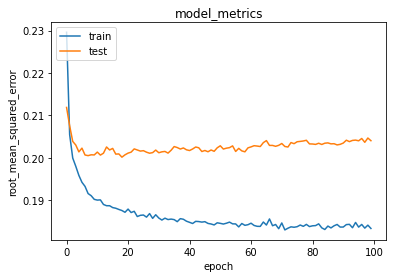

In [60]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari proses ini, kita memperoleh informasi bahwa nilai error akhir sebesar sekitar 0.18 dan error pada data validasi sebesar 0.20.


selanjutnya adalah kita akan mencoba mendapatkan rekomendasi film dengan cara mengambil sampel user secara acak dan definisikan variabel film_not_choices yang merupakan daftar film yang belum pernah dilihat oleh pengguna. karena nantinya film - film yang tidak pernah dilihat ini akan direkomendasikan kepada user .

seperti yang terlihat sebelumnya ,pengguna telah memberi rating pada beberapa film yang telah mereka lihat. Kita menggunakan rating ini untuk membuat rekomendasi film yang mungkin cocok untuk pengguna. Nah, film yang akan direkomendasikan tentulah film yang belum pernah dilihat oleh pengguna. Oleh karena itu, kita perlu membuat variabel film_not_choices sebagai daftar film untuk direkomendasikan pada pengguna. 



In [62]:
film_df = film_new
df = pd.read_csv('/content/movie_recommendation/ml-latest-small/ratings.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
film_choices_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
film_not_choices = film_df[~film_df['id'].isin(film_choices_by_user.movieId.values)]['id'] 
film_not_choises = list(
    set(film_not_choices)
    .intersection(set(film_to_film_encoded.keys()))
)
 
film_not_choices = [[film_to_film_encoded.get(x)] for x in film_not_choices]
user_encoder = user_to_user_encoded.get(user_id)
user_film_array = np.hstack(
    ([[user_encoder]] * len(film_not_choices), film_not_choices)
)

Selanjutnya, adalah mencoba memperoleh rekomendasi film , dengan menggunakan fungsi model.predict() dari library Keras .

In [64]:
ratings = model.predict(user_film_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_film_ids = [
    film_encoded_to_film.get(film_not_choices[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Film with high ratings from user')
print('----' * 8)
 
top_film_user = (
    film_choices_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
film_df_rows = film_df[film_df['id'].isin(top_film_user)]
for row in film_df_rows.itertuples():
    print(row.title, ':', row.genres)
 
print('----' * 8)
print('Top 10 film recommendation')
print('----' * 8)
 
recommended_film = film_df[film_df['id'].isin(recommended_film_ids)]
for row in recommended_film.itertuples():
    print(row.title, ':', row.genres)

Showing recommendations for users: 288
Film with high ratings from user
--------------------------------
2001: A Space Odyssey (1968) : Adventure|Drama|Sci-Fi
One Flew Over the Cuckoo's Nest (1975) : Drama
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) : Action|Adventure
Lawrence of Arabia (1962) : Adventure|Drama|War
Planet of the Apes (1968) : Action|Drama|Sci-Fi
--------------------------------
Top 10 film recommendation
--------------------------------
Paths of Glory (1957) : Drama|War
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
More (1998) : Animation|Drama|Sci-Fi|IMAX
Crossing Delancey (1988) : Comedy|Romance
Midnight Clear, A (1992) : Drama|War
Woman Under the Influence, A (1974) : Drama
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Into the Woods (1991) : Adventure|Comedy|Fantasy|Musical
